## __*Atividade Avalitiva 02 - Parte 1*__

Considerando o conjunto de dados Wine Dataset da UCI: </br> 
1. Explorar visualmente e numericamente os dados;
2. Preparar os dados utilizando as técnicas ensinadas na disciplina, quando pertinente;
3. Para cada técnica de preparação de dados aplicada, avaliar os algorimos K-NN, LogisticRegression, SVM, Árvore de descisão, RandomForest e um outro que deverá ser escolhido pelo aluno;
4. Utilizar gráficos e tabelas para apresentar as métricas obtidas (em treino e em teste), e escolher o melhor modelo com base em uma das métricas apresentadas. Justificar a escolha da métrica com base no sistema em questão;
5. Enviar a URL do jupyter notebook no GitHub</br></br>
_____________________________________

## __Identificação do problema__

Este dataset é constituído pelos resultados de uma análise química de vinhos produzidos em uma mesma região da Itália, mas de 3 diferentes vinícolas. A análise determinou as quantidades de 13 características encontradas em cada um dos 3 tipos de vinho.

A tarefa a ser desempenhada pelo algoritmo deve ser a de que, à partir da entrada das características de um suposto vinho por um usuário, o programa deve enquadrá-lo em um dos 3 tipos de vinho.
________________________

## *Passo 1 - Setup do projeto*
#### Importação das bibliotecas e identificação do endereço de download do dataset.

In [1]:
import os
import urllib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(f'Matplot version: {matplotlib.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')
print(f'Seaborn version: {sns.__version__}')

WINE_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/'
WINE_URL = WINE_ROOT + 'wine.data' 

DATA_PATH = os.path.join('..', 'data', 'raw')
DATA_FILE = 'wine.csv'
WINE_DATA = os.path.join(DATA_PATH, DATA_FILE)

RANDOM_STATE = 42

print('\nConfiguração completa !')

Matplot version: 3.3.2
Numpy version: 1.19.2
Pandas version: 1.2.1
Scikit-learn version: 0.23.2
Seaborn version: 0.11.1

Configuração completa !


__________________________________
## *Passo 2 - Download e Carregamento dos Dados*
#### Download do dataset e carregamento do mesmo para um DataFrame.

In [2]:
def download_data(data_url, data_path, data_file):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)
    
download_data(WINE_URL, DATA_PATH, DATA_FILE)

In [3]:
col_names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 
             'flavanoids', 'nonflav_phenols', 'proanthocyanins', 'color', 'hue', 'od280_od350', 'proline']

In [4]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    return pd.read_csv(local_path, header=None, names=col_names)

wine_df = load_data(DATA_PATH, DATA_FILE)

_____________________
## *Passo 3 - Análise Exploratória de Dados*
#### Análise dos dados buscando identificar dados inválidos e faltantes. Nessa etapa os dados serão transformados e normalizados, caso haja necessidade.

In [5]:
print(f'O dataframe wine_df possui {wine_df.shape[0]} linhas e {wine_df.shape[1]} colunas.')

O dataframe wine_df possui 178 linhas e 14 colunas.


In [6]:
wine_df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color,hue,od280_od350,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   class              178 non-null    int64  
 1   alcohol            178 non-null    float64
 2   malic_acid         178 non-null    float64
 3   ash                178 non-null    float64
 4   alcalinity_of_ash  178 non-null    float64
 5   magnesium          178 non-null    int64  
 6   total_phenols      178 non-null    float64
 7   flavanoids         178 non-null    float64
 8   nonflav_phenols    178 non-null    float64
 9   proanthocyanins    178 non-null    float64
 10  color              178 non-null    float64
 11  hue                178 non-null    float64
 12  od280_od350        178 non-null    float64
 13  proline            178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### _O DataFrame não possui dados ausentes._
________________

In [8]:
wine_df.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color,hue,od280_od350,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### _Os dados das features possuem valores com amplitudes muito distantes entre si. Dessa forma, os mesmos deverão ser normalizados._
___________

In [9]:
wine_df['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

### _As classes não estão com valores equilibrados. Assim sendo, a feature class, para treinamento e teste, deverá ser estratificada._
___________

In [10]:
X = wine_df.drop(['class'], axis=1)
y = wine_df['class']

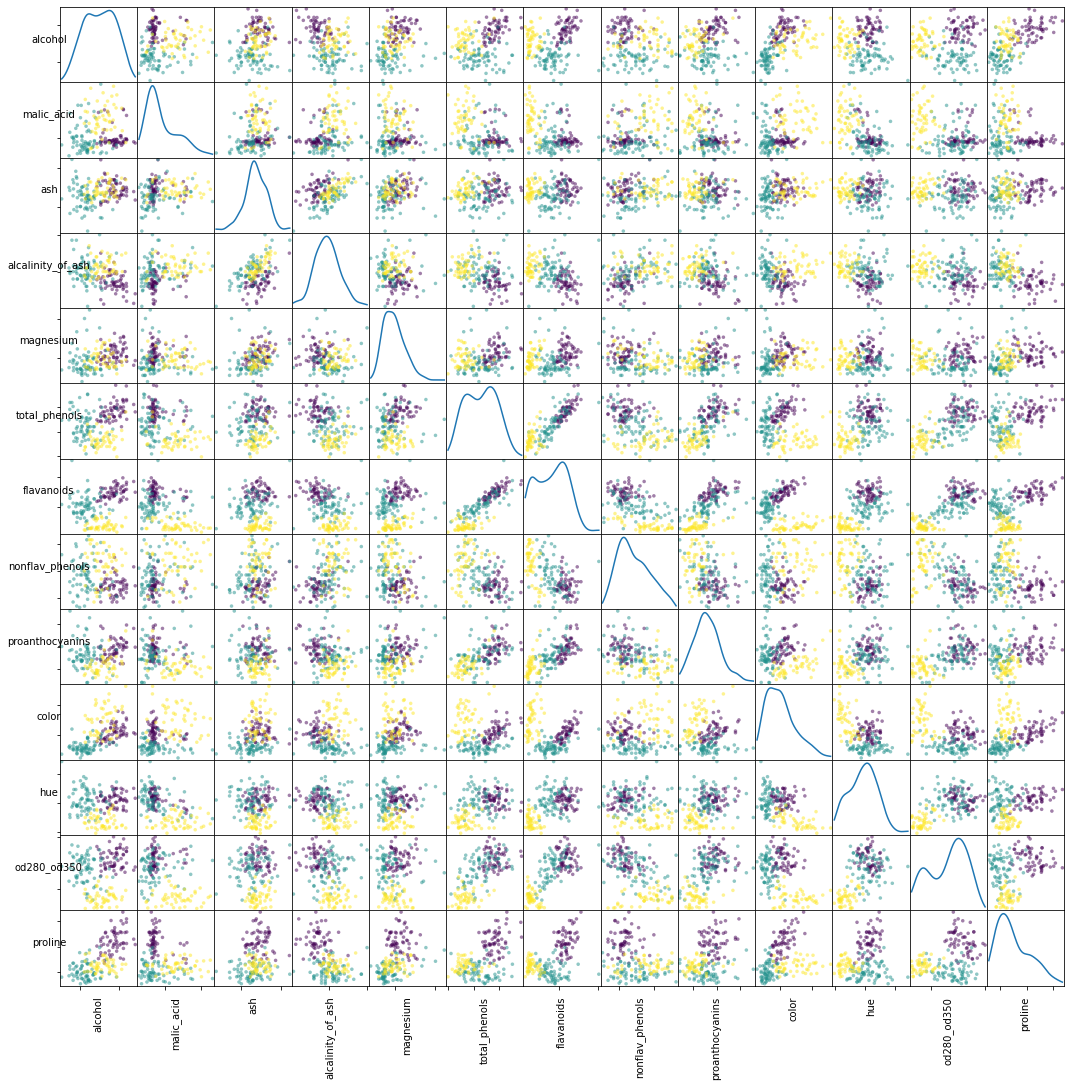

In [11]:
cores = y.astype('category').cat.codes
_ = pd.plotting.scatter_matrix(X, c=cores, figsize=[18,18], marker='.', diagonal='kde', s=50)

for ax in _.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

_____________
### Normalização das *features* para aplicação no algoritmo.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns

In [13]:
X_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color,hue,od280_od350,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


_____________
## *Passo 4 - Treinamento do Modelo*
#### Nessa etapa, os dados serão divididos em sets de treinamento e teste e aplicados nos algoritmos de Machine Learning, sendo escolhidos alguns ajustes para os hiperparâmetros mais importantes, no qual o Cross Validation selecionará os mais efetivos.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, stratify=y, random_state=RANDOM_STATE)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (124, 13)
y_train shape: (124,)
X_test shape: (54, 13)
y_test shape: (54,)


In [15]:
# Comparacao de tamanho da y_train e y_test a fim de se verificar se a proporcao das classes foi mantida.

print('y_train size: ')
print(y_train.value_counts())

print('\ny_test size: ')
print(y_test.value_counts())

y_train size: 
2    50
1    41
3    33
Name: class, dtype: int64

y_test size: 
2    21
1    18
3    15
Name: class, dtype: int64


_______________________

### _Importação das bibliotecas adicionais dos demais algoritmos._
### _Além dos algoritmos já estipulados, foi-se optado também pelo Classificador Naive-Bayes. Dentre os modelos disponíveis para este algoritmo, foi-se escolhido o Gaussian Naive-Bayes, por ser de utilização geral e multi-classe._

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB

In [17]:
def build_classifiers():
    """
    Retorna uma lista com os classificadores que serão avaliados.
    """
    classifiers = []
    classifiers.append(
                      ('knn',                              # nome do classificador
                        KNeighborsClassifier(),            # instancia do classificador
                        {'n_neighbors' : range(1, 33, 2)}  # hiperparametros
                      )
    )

    classifiers.append(
                      ('lr',                               # nome do classificador
                        LogisticRegression(max_iter=1000), # instancia do classificador
                        {'penalty' : ['l2'], 'C' : [100, 10, 1, 0.1, 0.01]}  # hiperparametros
                      )
    )
    
    classifiers.append(
                      ('svm',
                        SVC(),
                        {'kernel' : ['linear', 'rbf'], 
                         'C' : [2 ** (-5), 1, 2 ** 5, 2 ** 10],
                         'gamma' : [2 ** (-15), 2 ** (-10), 2 ** (-5), 1, 2 ** 5]
                        }
                      )
    )
    
    classifiers.append(
                      ('dt',
                        DecisionTreeClassifier(),
                        {'max_depth' : [2, 4, 6, 8, 10, 12]}
                      )  
    )
    
    classifiers.append(
                      ('rf',
                        RandomForestClassifier(),
                        {'n_estimators' : [10, 50, 100]}
                      ) 
    )
    
    classifiers.append(
                      ('gnb',
                        GaussianNB(),
                        {'var_smoothing' : [1e-07, 1e-08, 1e-09, 1e-10]}
                      ) 
    )
    return classifiers

In [18]:
classifiers = build_classifiers()
results = []
names = []

for name, model, parameters in classifiers:
    print(f'\n>> Classificador: {name}')
    gs = GridSearchCV(estimator=model, param_grid=parameters, refit=True, verbose=0)
    gs.fit(X_train, y_train)
    kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    cv = cross_val_score(gs, X_train, y_train, cv=kf, scoring='accuracy')
    print(f'Media do resultado do treinamento do CV: {cv.mean():.4f}')
    print(f'Desvio padrao das medicoes dos resultados: {cv.std():.4f}')
    print(f'O melhor resultado foi: {gs.best_params_} com score de {gs.best_score_:.4f}')

    results.append(cv)
    names.append(name)
    
    if name == 'knn':
        y_pred_knn = gs.predict(X_test)
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'lr':
        y_pred_lr = gs.predict(X_test)       
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'svm':
        y_pred_svm = gs.predict(X_test)
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'dt':
        y_pred_dt = gs.predict(X_test)
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'rf':
        y_pred_rf = gs.predict(X_test)        
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'gnb':
        y_pred_gnb = gs.predict(X_test)        
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')


>> Classificador: knn
Media do resultado do treinamento do CV: 0.9673
Desvio padrao das medicoes dos resultados: 0.0547
O melhor resultado foi: {'n_neighbors': 3} com score de 0.9673
Acuracia do modelo knn: 0.944

>> Classificador: lr
Media do resultado do treinamento do CV: 0.9756
Desvio padrao das medicoes dos resultados: 0.0372
O melhor resultado foi: {'C': 100, 'penalty': 'l2'} com score de 0.9753
Acuracia do modelo lr: 0.981

>> Classificador: svm
Media do resultado do treinamento do CV: 0.9833
Desvio padrao das medicoes dos resultados: 0.0333
O melhor resultado foi: {'C': 32, 'gamma': 1, 'kernel': 'rbf'} com score de 0.9920
Acuracia do modelo svm: 0.963

>> Classificador: dt
Media do resultado do treinamento do CV: 0.8609
Desvio padrao das medicoes dos resultados: 0.0831
O melhor resultado foi: {'max_depth': 10} com score de 0.8863
Acuracia do modelo dt: 0.963

>> Classificador: rf
Media do resultado do treinamento do CV: 0.9756
Desvio padrao das medicoes dos resultados: 0.0372


__________
### _Matrizes de confusão para comparação e análise dos resultados_

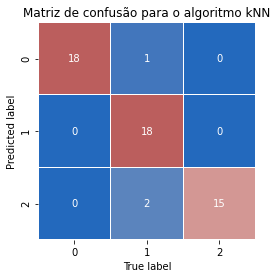

In [19]:
cm = confusion_matrix(y_test, y_pred_knn)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=10)
_ = plt.title('Matriz de confusão para o algoritmo kNN')
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

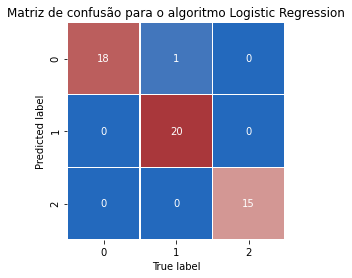

In [20]:
cm = confusion_matrix(y_test, y_pred_lr)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=10)
_ = plt.title('Matriz de confusão para o algoritmo Logistic Regression')
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

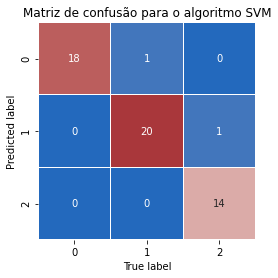

In [21]:
cm = confusion_matrix(y_test, y_pred_svm)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=10)
_ = plt.title('Matriz de confusão para o algoritmo SVM')
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

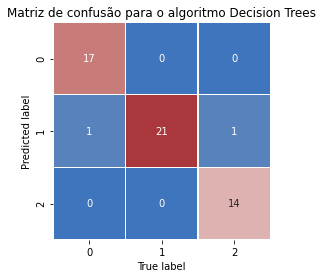

In [22]:
cm = confusion_matrix(y_test, y_pred_dt)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=10)
_ = plt.title('Matriz de confusão para o algoritmo Decision Trees')
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

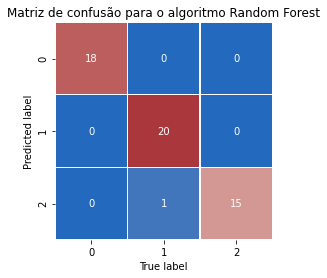

In [23]:
cm = confusion_matrix(y_test, y_pred_rf)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=10)
_ = plt.title('Matriz de confusão para o algoritmo Random Forest')
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

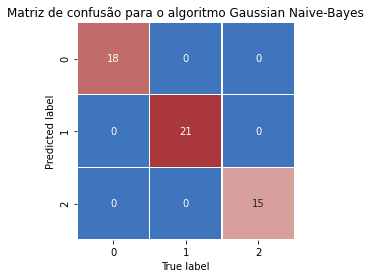

In [24]:
cm = confusion_matrix(y_test, y_pred_gnb)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=10)
_ = plt.title('Matriz de confusão para o algoritmo Gaussian Naive-Bayes')
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

__________
### _Análise dos resultados da Precisão, Revocação e F1-Score_

In [25]:
print('Precisão, revocação e F1-score:')
print('\n--------------------- Modelo kNN --------------------')
print(classification_report(y_test, y_pred_knn))
print('\n-------------- Modelo Logistic Regression -----------')
print(classification_report(y_test, y_pred_lr))
print('\n--------------------- Modelo SVM --------------------')
print(classification_report(y_test, y_pred_svm))
print('\n---------------- Modelo Decision Trees---------------')
print(classification_report(y_test, y_pred_dt))
print('\n---------------- Modelo Random Forest ---------------')
print(classification_report(y_test, y_pred_rf))
print('\n------------- Modelo Gaussian Naive-Bayes -----------')
print(classification_report(y_test, y_pred_gnb))

Precisão, revocação e F1-score:

--------------------- Modelo kNN --------------------
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.86      0.92        21
           3       0.88      1.00      0.94        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


-------------- Modelo Logistic Regression -----------
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


--------------------- Modelo SVM --------------------
              precision    recall  f1-sco

__________
### _Boxplots das medidas adquiridas durante o treinamento de cada algoritmo._

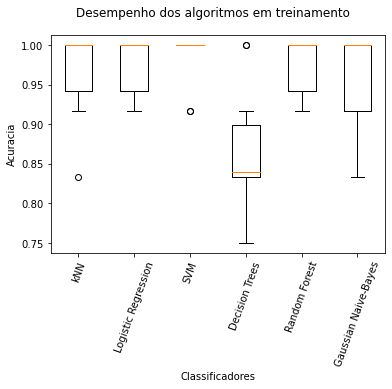

In [26]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho dos algoritmos em treinamento')
plt.boxplot(results)
ax.set_xticklabels(['kNN', 'Logistic Regression', 'SVM', 'Decision Trees', 'Random Forest', 'Gaussian Naive-Bayes'])
ax.set_xlabel('Classificadores')
ax.set_ylabel('Acuracia')
plt.xticks(rotation=70)
plt.show()

## __*Resultado:*__

### Baseado nos resultados, foi-se escolhido o algoritmo *__Naive-Bayes__*. Adotou-se como critério para a seleção do modelo, a acurácia do mesmo, devido ao tipo de tarefa a ser desempenhada. Uma classificação incorreta do tipo de vinho não traz consequências danosas ao qual justificassem o uso da precisão ou revocação (que também apresentaram ótimos resultados). Assim sendo, para este caso em particular julgou-se mais importante a quantidade de acertos do algoritmo.

### É importante frisar que os resultados podem variar, sendo que na simulação o algoritmo Random Forest também apresentou bons resultados, mas foi menos estável que o Naive-Bayes.